In [1]:
# pip install beautifulsoup4 

In [18]:
import requests
from bs4 import BeautifulSoup 
from IPython.display import Image

In [16]:
# Functions
def add_pic(pic_name):
    return Image(filename='./pics/bs4/'+ pic_name)  

In [5]:
r = requests.get('http://python123.io/ws/demo.html')
print(r.status_code)
r.text

200


'<html><head><title>This is a python demo page</title></head>\r\n<body>\r\n<p class="title"><b>The demo python introduces several python courses.</b></p>\r\n<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n<a href="http://www.icourse163.org/course/BIT-268001" class="py1" id="link1">Basic Python</a> and <a href="http://www.icourse163.org/course/BIT-1001870001" class="py2" id="link2">Advanced Python</a>.</p>\r\n</body></html>'

In [6]:
demo = r.text
soup = BeautifulSoup(demo, 'html.parser') # 'html.parser'是告诉bs4解析的方式
# soup2 = BeautifulSoup(open('D://demo.html'), 'html.parser') # 解析本地html文件
# parser n.解析程序,解析器

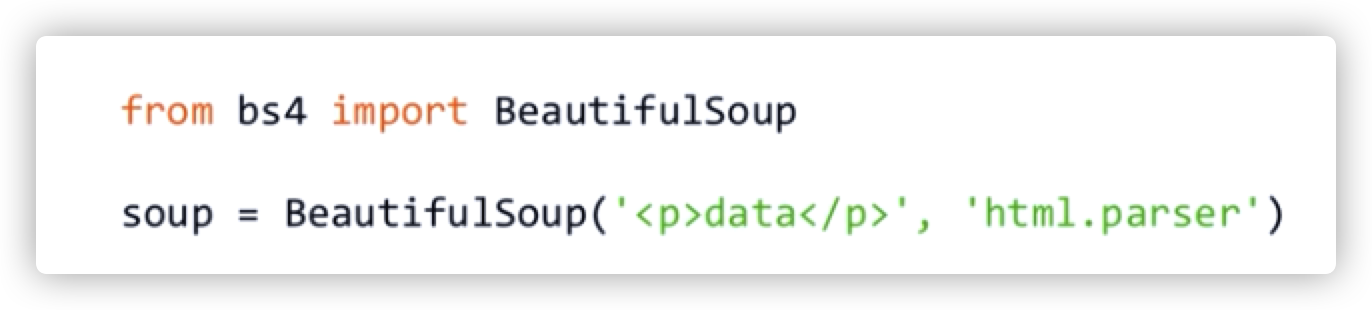

In [19]:
add_pic('soup.png')

In [10]:
print(soup.prettify)

<bound method Tag.prettify of <html><head><title>This is a python demo page</title></head>
<body>
<p class="title"><b>The demo python introduces several python courses.</b></p>
<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>
</body></html>>


In [8]:
print(soup.prettify())

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


In [14]:
soup.prettify()

'<html>\n <head>\n  <title>\n   This is a python demo page\n  </title>\n </head>\n <body>\n  <p class="title">\n   <b>\n    The demo python introduces several python courses.\n   </b>\n  </p>\n  <p class="course">\n   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\n   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">\n    Basic Python\n   </a>\n   and\n   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">\n    Advanced Python\n   </a>\n   .\n  </p>\n </body>\n</html>'

### 注意用不用print( )和prettify后面加不加（），结果有一些区别
### 应该print(soup.prettify( ))显示的最清晰

### bs4库的基本元素

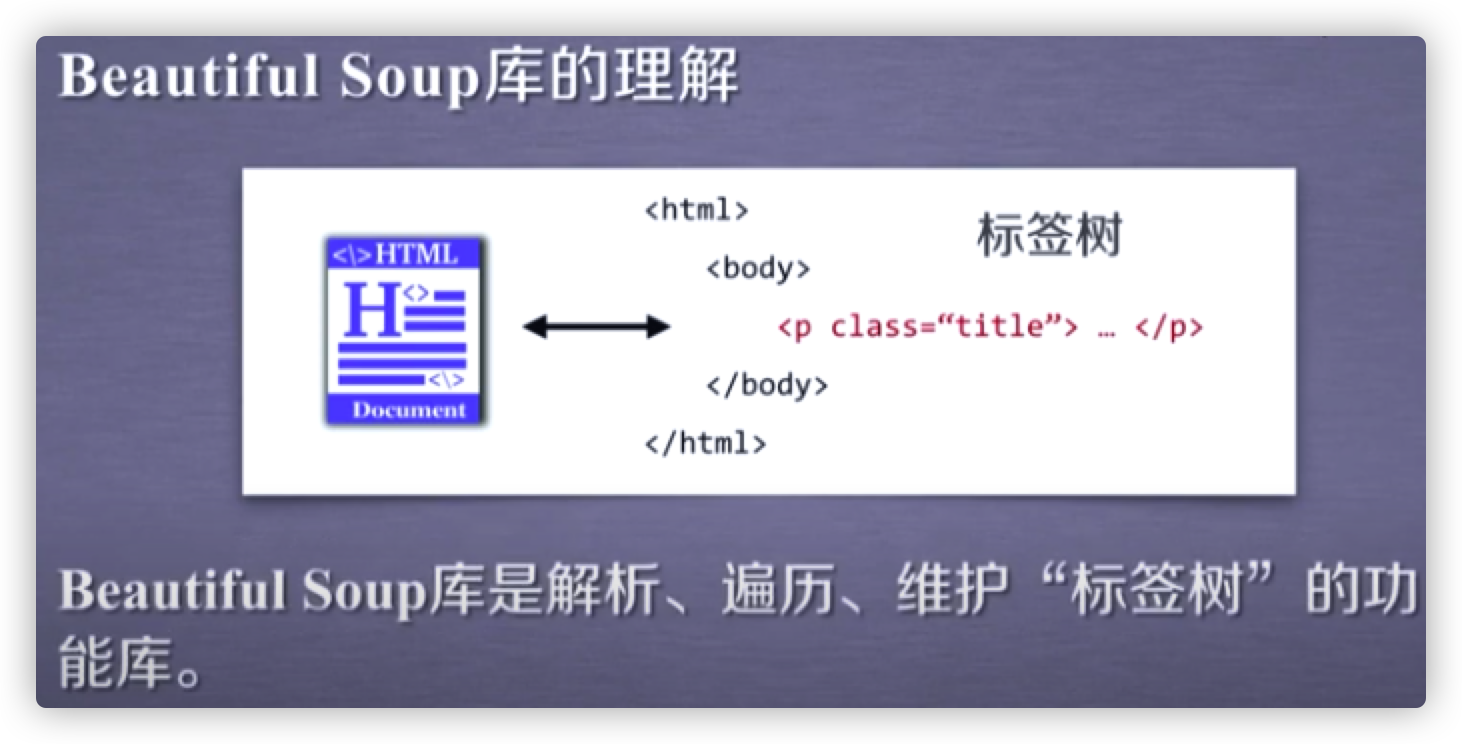

In [21]:
add_pic('soup1.png')

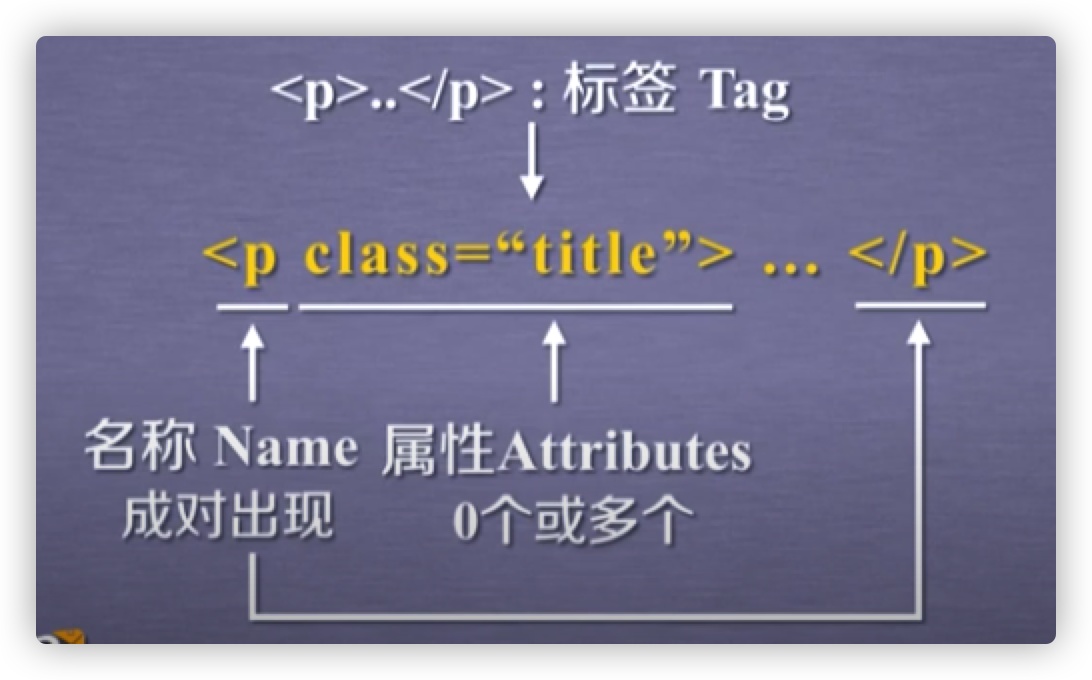

In [22]:
add_pic('tag.png')

其中 class='title', 是一个dict形式

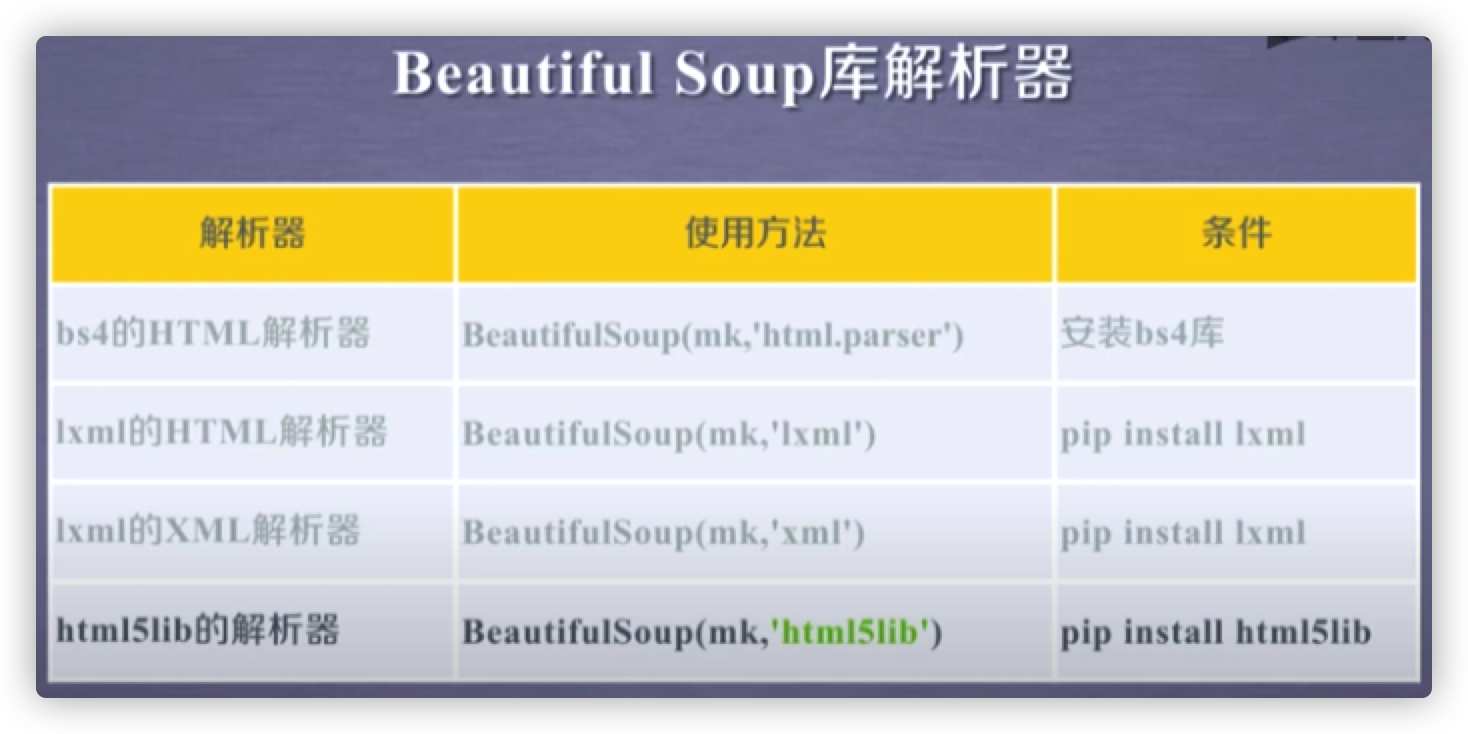

In [23]:
add_pic('parsers.png')

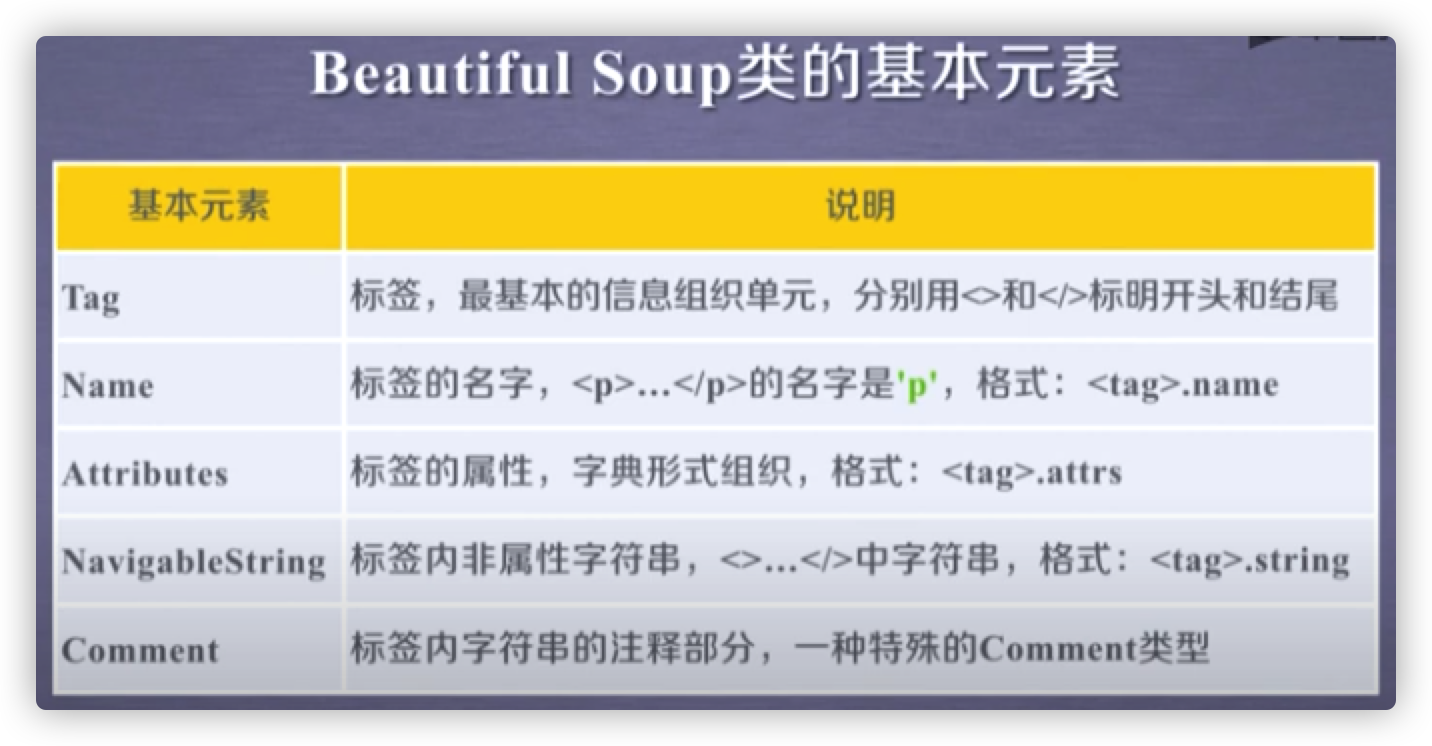

In [24]:
add_pic('bs_elements.png')

In [25]:
soup

<html><head><title>This is a python demo page</title></head>
<body>
<p class="title"><b>The demo python introduces several python courses.</b></p>
<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>
</body></html>

 0.获取网页title

In [26]:
soup.title #获取网页的网页名

<title>This is a python demo page</title>

1.获得标签Tag

In [38]:
tag = soup.a # .a 标签就是链接标签
tag

<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>

2.获得标签的名字name

In [40]:
print(soup.a.name)
print(soup.a.parent.name) #a标签的父亲是p标签
print(soup.a.parent.parent.name) #p标签的父亲是body标签

a
p
body


3.获得标签的属性attributes

In [46]:
# tag = soup.a
print(tag.attrs) # 回复两个dict
print('\n')
print(tag.attrs['class'])

{'href': 'http://www.icourse163.org/course/BIT-268001', 'class': ['py1'], 'id': 'link1'}


['py1']


In [52]:
print(type(soup.a.parent.parent.name))
print(type(tag.attrs['class']))
print(type(tag))

<class 'str'>
<class 'list'>
<class 'bs4.element.Tag'>


4.获得标签内非属性字符串NavigableString

In [62]:
print(soup.a.string)
print(soup.p)
print(soup.p.string)
print(type(soup.p.string))

Basic Python
<p class="title"><b>The demo python introduces several python courses.</b></p>
The demo python introduces several python courses.
<class 'bs4.element.NavigableString'>


注意soup.p.string的标签类型是NavigableString,它可以跨越某些标签，比如（<b></b>）

5.获得comment

In [65]:
newsoup = BeautifulSoup('<b><! --this is a comment --></b><p>this is not a comment</p>',
                       'html.parser')
# 这段文字是课堂视频中的，注意，<! 表示一段注释的开始

In [68]:
print(newsoup.b.string)

type(newsoup.b.string) #注意和下方p标签比较的区别

 --this is a comment --


bs4.element.Comment

In [69]:
print(newsoup.p.string)
print(type(newsoup.p.string)) 

this is not a comment
<class 'bs4.element.NavigableString'>


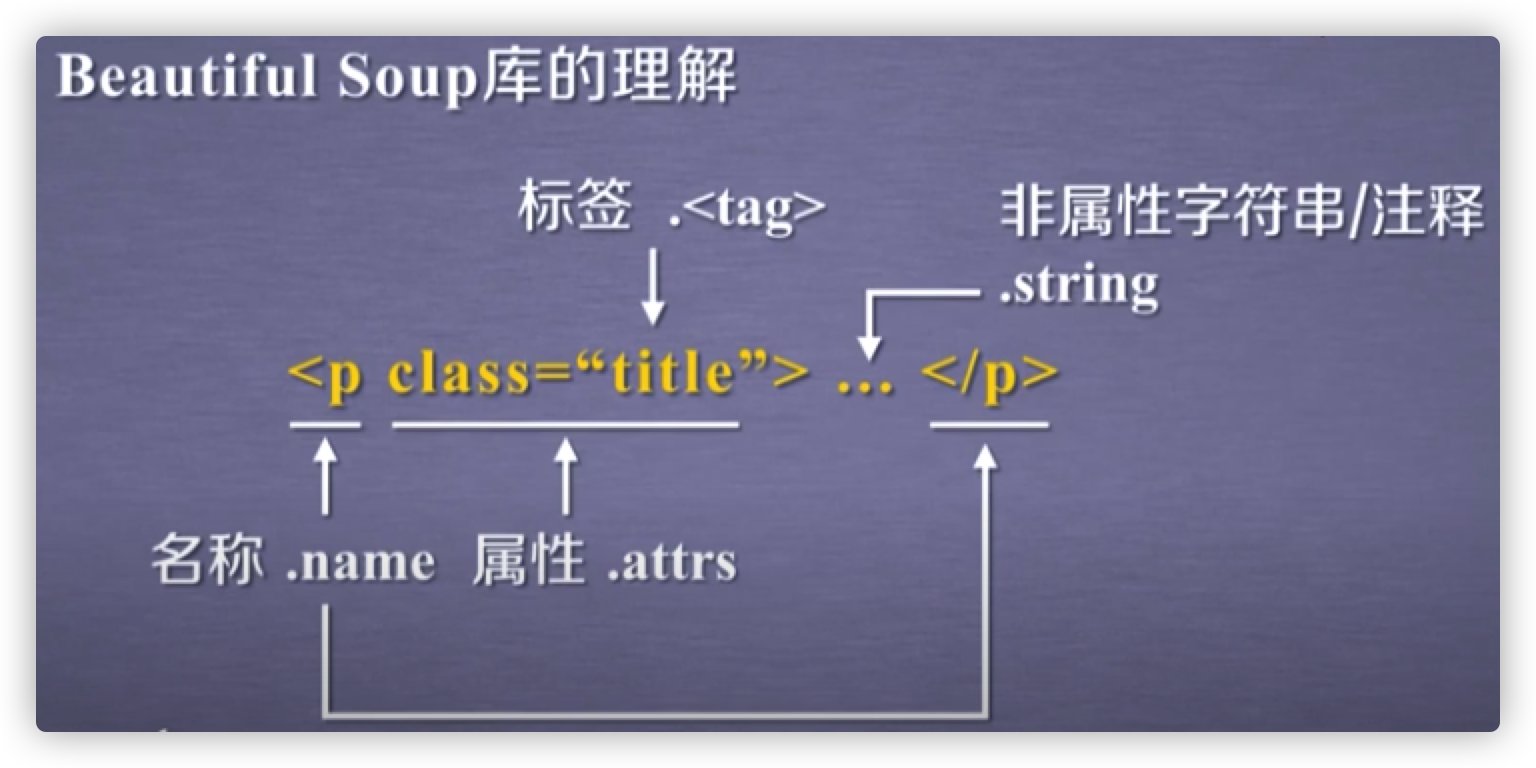

In [70]:
add_pic('parser_functions.png')

对应的取出网页中的一些信息

### HTML的遍历方法

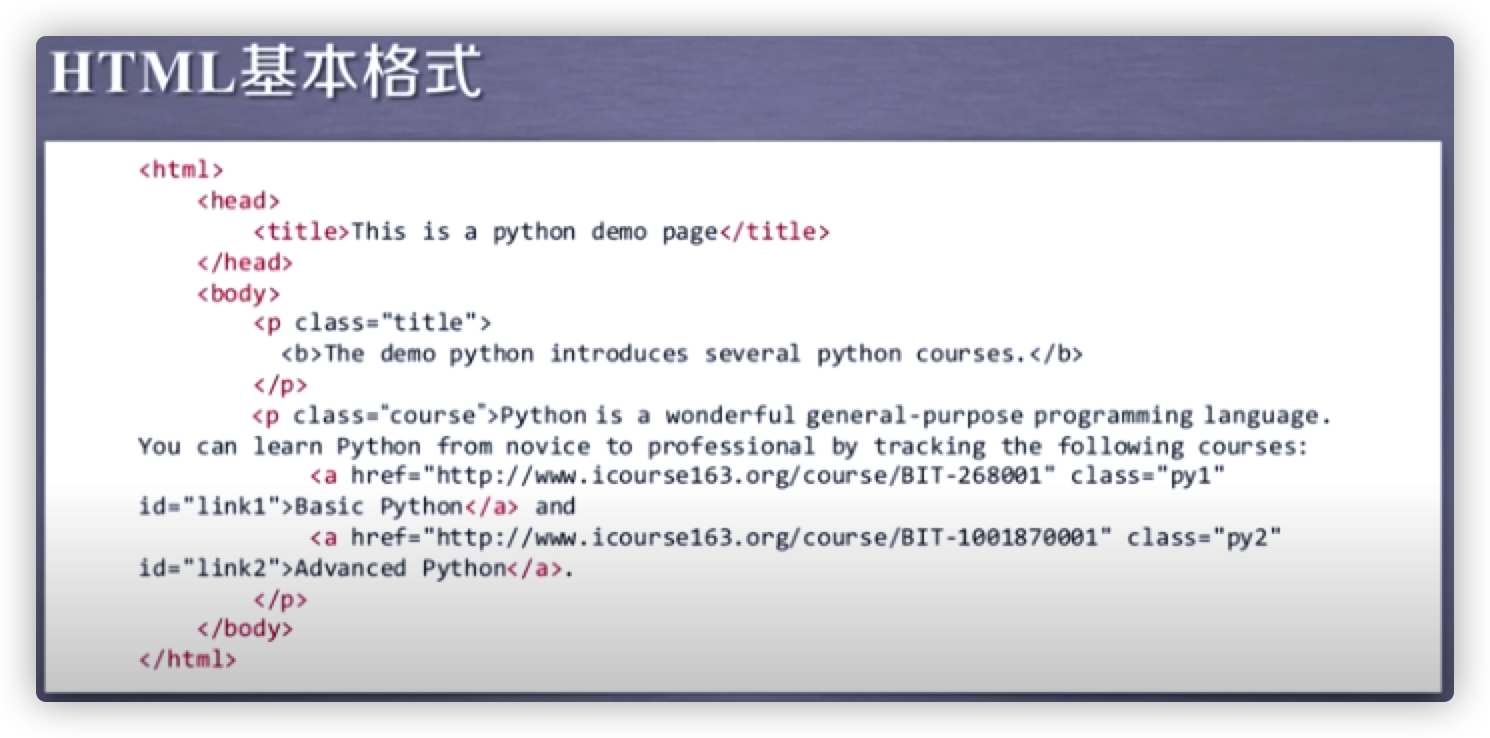

In [72]:
# HTML内容的基本结构
add_pic('html.png') 

树形结构遍历的逻辑

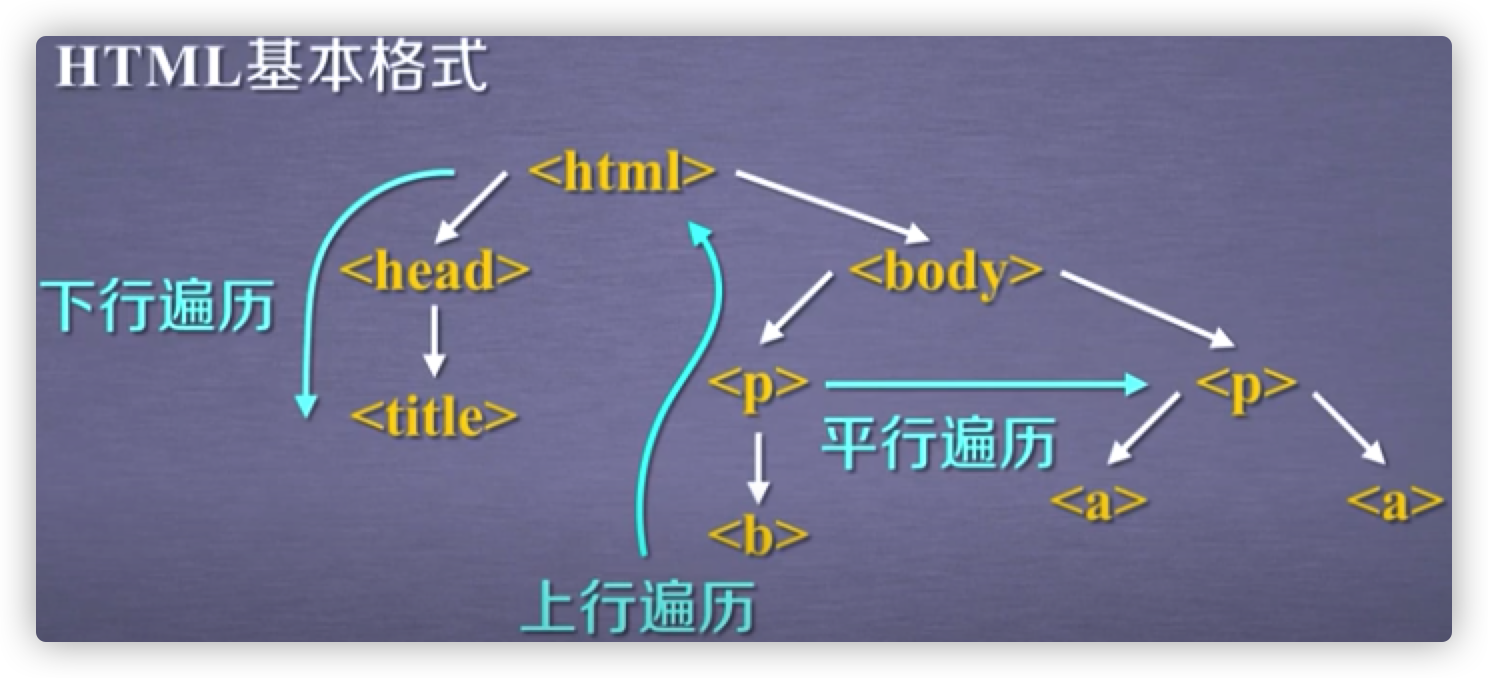

In [73]:
add_pic('logic.png')

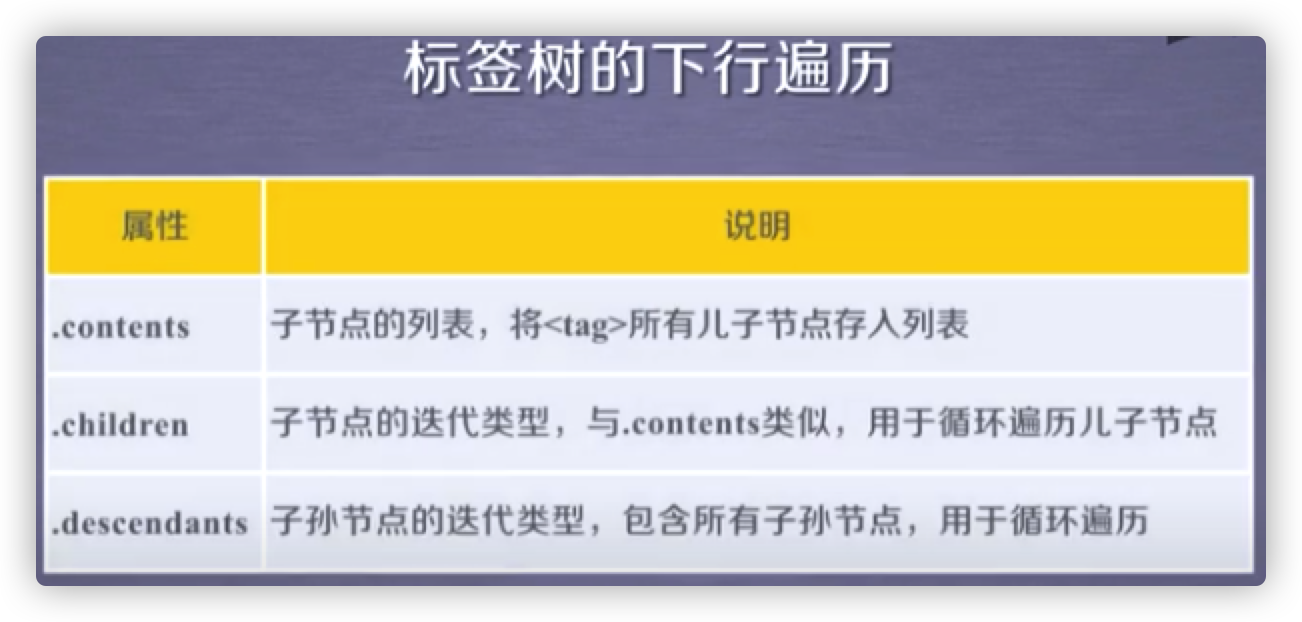

In [74]:
#标签树的下行遍历的三个方法
add_pic('downward.png')

In [77]:
# 
soup = BeautifulSoup(demo, 'html.parser')
soup.head

<head><title>This is a python demo page</title></head>

In [78]:
# 获得soup的儿子节点, 意思是head标签中含有一个title标签,是它的儿子节点
soup.head.contents # 返回的是一个列表

[<title>This is a python demo page</title>]

In [79]:
soup.body.contents
# 可以看到body中有很多不同的元素，每个元素代表body的信息：
# 注意，对于一个标签的儿子节点，并不仅仅包括标签节点，也包括字符串节点，比如’\n‘这种
# 回车，也是儿子节点类型。

['\n',
 <p class="title"><b>The demo python introduces several python courses.</b></p>,
 '\n',
 <p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>,
 '\n']

In [80]:
# 可以用len（）获取儿子节点的数量
len(soup.body.contents)

5

In [81]:
# 选取第二个节点
soup.body.contents[1]
# 它返回的就是p标签的内容

<p class="title"><b>The demo python introduces several python courses.</b></p>

In [91]:
for child in soup.body.children:
    print(list(enumerate(child,start=1)))

[(1, '\n')]
[(1, <b>The demo python introduces several python courses.</b>)]
[(1, '\n')]
[(1, 'Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n'), (2, <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>), (3, ' and '), (4, <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>), (5, '.')]
[(1, '\n')]


In [89]:
for child in soup.body.children:
    print(child)



<p class="title"><b>The demo python introduces several python courses.</b></p>


<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>




In [97]:
next(soup.body.children)

'\n'

### Python之Iterable与Iterator

In [ ]:
# https://zhuanlan.zhihu.com/p/32162554
# 这二者是有区别的，但我暂时不明白区别在哪里

### 爬虫，大学排名
 https://zhuanlan.zhihu.com/p/47642602

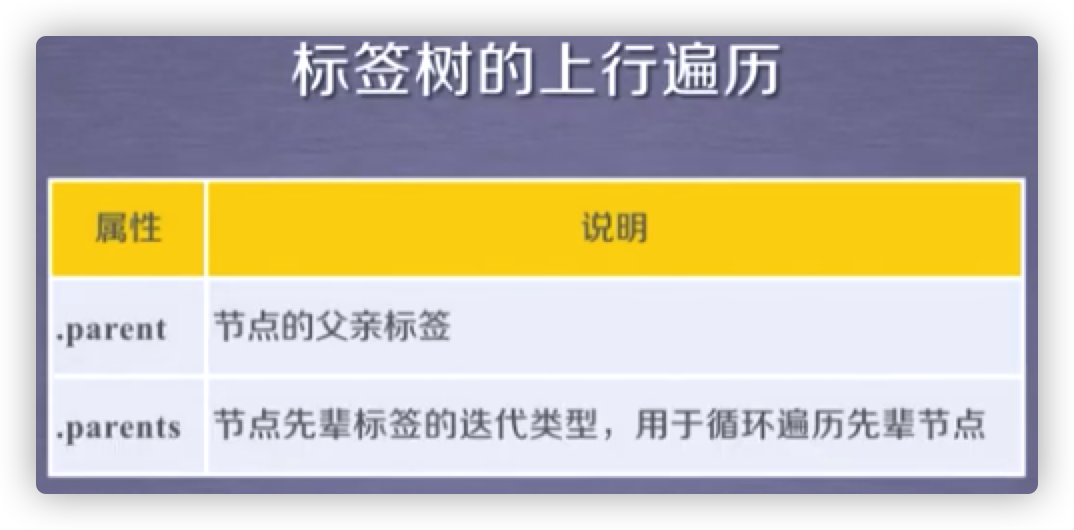

In [98]:
add_pic('logic2.png')

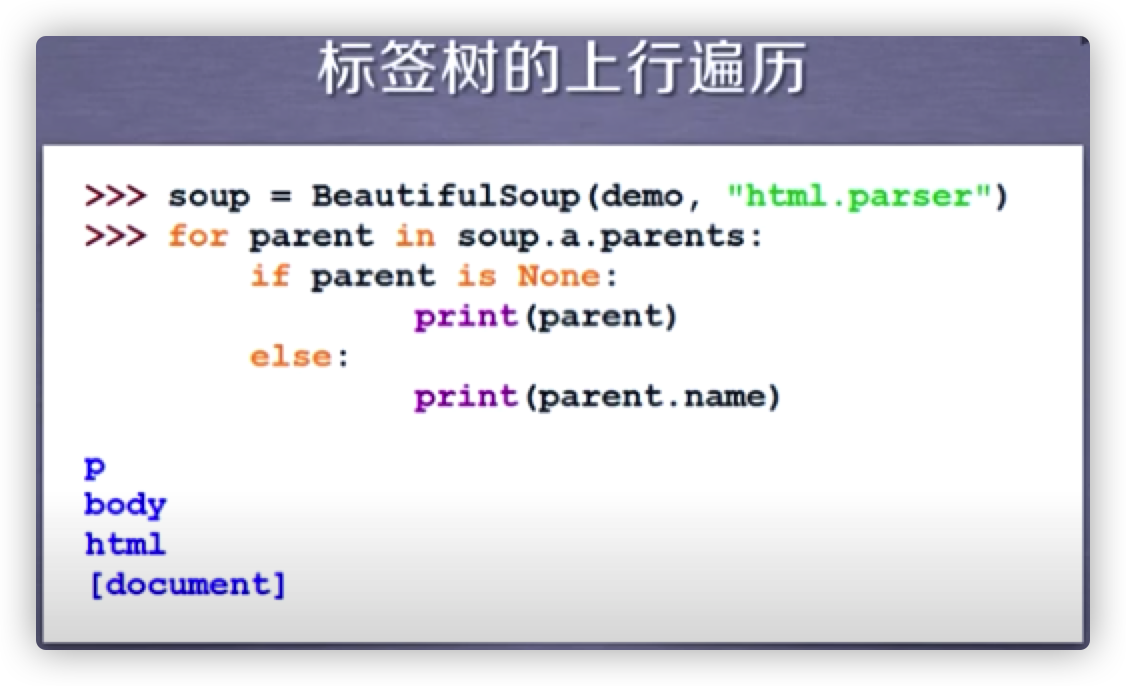

In [99]:
add_pic('logic3.png')

In [100]:
soup = BeautifulSoup(demo , 'html.parser')
for parent in soup.a.parents:
    if parent is None:
        print(parent)
    else:
        print(parent.name)

print('如果向上寻找parent已经到顶，就不能没有什么可返回的了')

p
body
html
[document]


In [101]:
soup.title.parent

<head><title>This is a python demo page</title></head>

In [107]:
print(soup.p.parent)
type(soup.p.parent)

<body>
<p class="title"><b>The demo python introduces several python courses.</b></p>
<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>
</body>


bs4.element.Tag

In [106]:
print(soup.body.parent)
type(soup.body.parent)

<html><head><title>This is a python demo page</title></head>
<body>
<p class="title"><b>The demo python introduces several python courses.</b></p>
<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>
</body></html>


bs4.element.Tag

In [113]:
soup.a.parent

<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>

In [27]:
rr = requests.get('http://www.ngchina.com.cn/index.php?m=content&c=index&a=show&catid=669&id=238915')
rr.status_code

200

In [29]:
rr.text

'\n<!doctype html>\n<html xmlns:wb="http://open.weibo.com/wb">\n<head>\n<meta charset="UTF-8">\n<meta name="keywords" content="争夺">\n<meta name="description" content="争夺战">\n<meta name="viewpoint" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=0;">\n<meta http-equiv="x-ua-compatible" content="IE=edge">\n<title>争夺战 - 摄影大赛2019 - 国家地理中文网</title>\n<link rel="stylesheet" type="text/css" href="/statics/css/template2017/sections.css">\n<link rel="stylesheet" type="text/css" href="/statics/css/template2017/header_footer.css">\n<script language="JavaScript" src="/statics/js/template2017/jquery-1.11.1.min.js"></script>\n<script language="JavaScript" src="/statics/js/template2017/sea.2.1.0.js"></script>\n<script language="JavaScript" src="/statics/js/template2017/rem.js"></script>\n<script type="text/javascript">\n\t\tfunction loginshow()\n\t\t{\n\t\t\t$.get(\'/index.php?m=member&c=ajaxlogin&a=login\', function(msg){\n                if(msg.suc

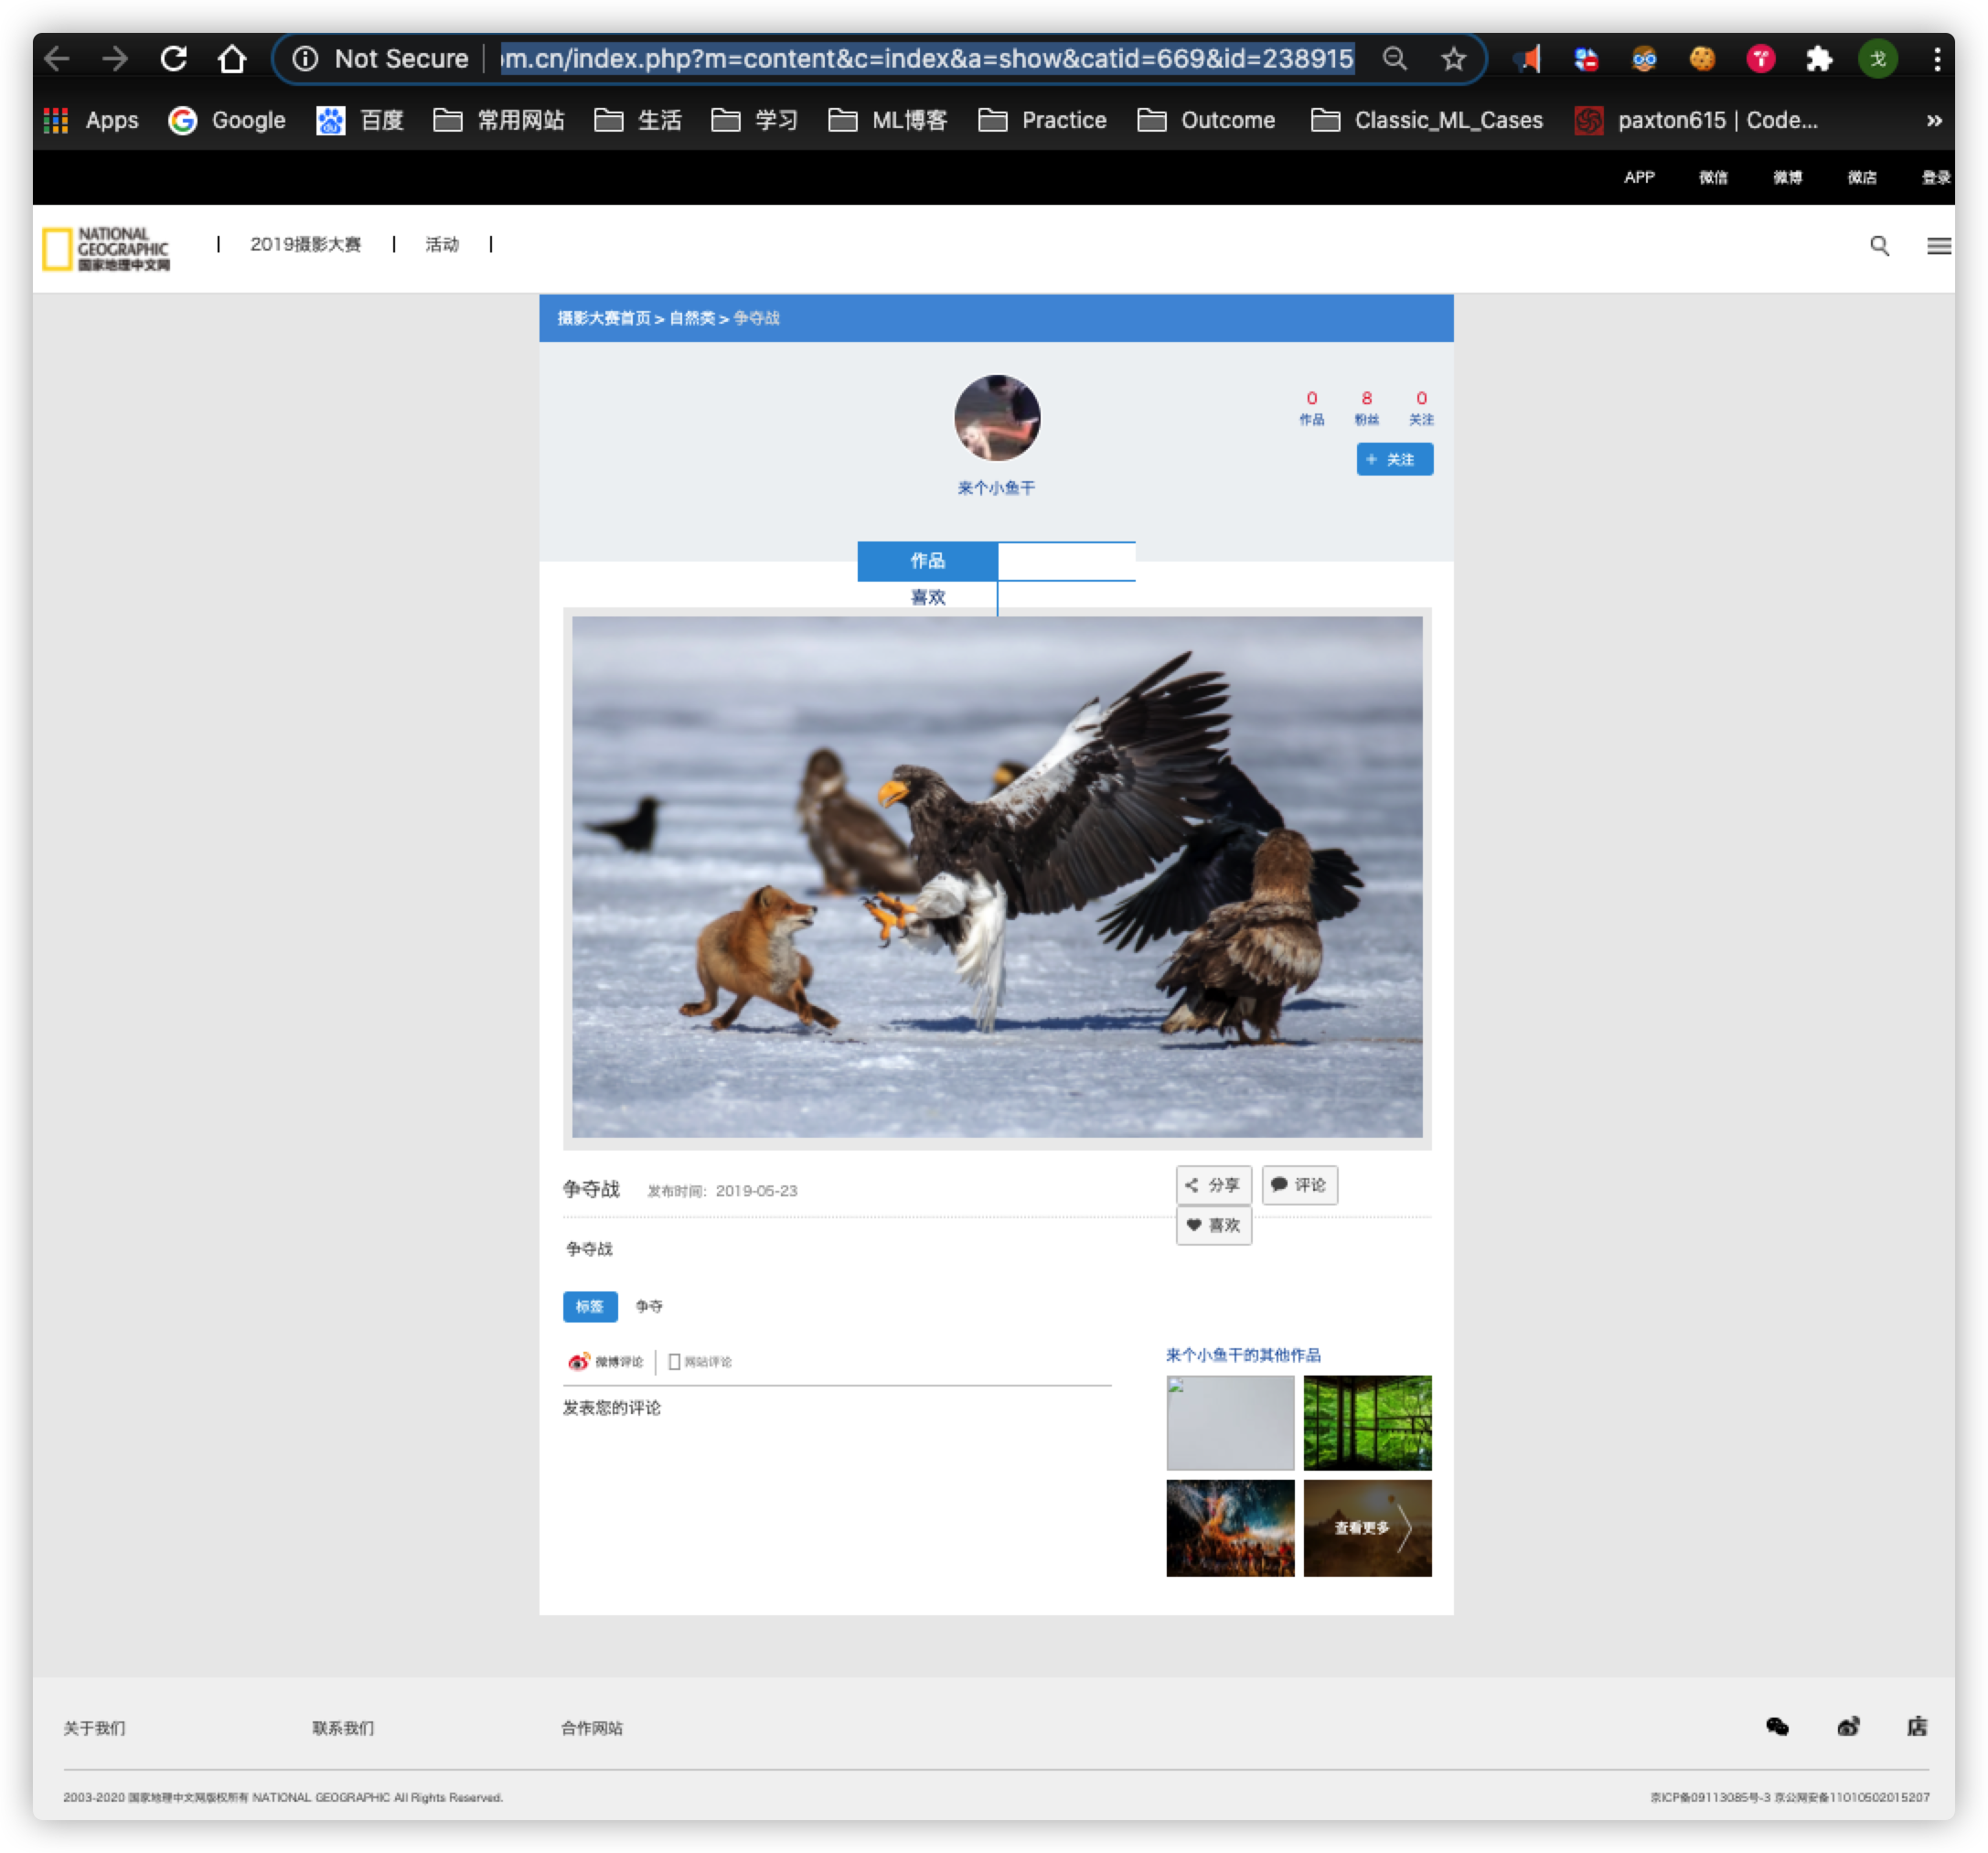

In [32]:
add_pic('national_geo_example.png')

In [33]:
rr_soup = BeautifulSoup(rr.text, 'html.parser')

In [36]:
rr_soup.title

<title>争夺战 - 摄影大赛2019 - 国家地理中文网</title>

In [37]:
print(rr_soup.prettify())

<!DOCTYPE html>
<html xmlns:wb="http://open.weibo.com/wb">
 <head>
  <meta charset="utf-8"/>
  <meta content="争夺" name="keywords"/>
  <meta content="争夺战" name="description"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=0;" name="viewpoint"/>
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <title>
   争夺战 - 摄影大赛2019 - 国家地理中文网
  </title>
  <link href="/statics/css/template2017/sections.css" rel="stylesheet" type="text/css"/>
  <link href="/statics/css/template2017/header_footer.css" rel="stylesheet" type="text/css"/>
  <script language="JavaScript" src="/statics/js/template2017/jquery-1.11.1.min.js">
  </script>
  <script language="JavaScript" src="/statics/js/template2017/sea.2.1.0.js">
  </script>
  <script language="JavaScript" src="/statics/js/template2017/rem.js">
  </script>
  <script type="text/javascript">
   function loginshow()
		{
			$.get('/index.php?m=member&c=ajaxlogin&a=login', function(msg){
       

In [39]:
rr_tag = rr_soup.a
rr_tag

<a href="http://www.ngchina.com.cn/index.php?m=member&amp;c=index&amp;a=public_forget_password&amp;siteid=1">忘记密码</a>

### 没想到这么小一页网页也有那么复杂的代码

In [47]:
egg = requests.get('https://www.eggla.co.uk/shop/food/sauces/page/16/')
egg.status_code

200

In [48]:
egg.text

'<!DOCTYPE html>\n<html lang="en-GB">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width,user-scalable=no">\n<link rel="profile" href="http://gmpg.org/xfn/11"/>\n<link rel="pingback" href="https://www.eggla.co.uk/xmlrpc.php"/>\n <!--[if lt IE 9]>\n\t\t<![endif]-->\n\n\t<!-- This site is optimized with the Yoast SEO plugin v14.6.1 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>调料系列 - Sauces Archives | Page 16 of 16 | EGGLA | COOL | UNUSUAL | QUIRKY | HOMEWARE | GIFTS | ACCESSORIES</title>\n\t<meta name="robots" content="index, follow" />\n\t<meta name="googlebot" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n\t<meta name="bingbot" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n\t<link rel="canonical" href="https://www.eggla.co.uk/shop/food/sauces/page/16/" />\n\t<link rel="prev" href="https://www.eggla.co.uk/shop/food/sauces/page/15/" />\n\t<meta property="o

In [51]:
egg_soup = BeautifulSoup(egg.text, 'html.parser')
print(egg_soup.prettify())

<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,user-scalable=no" name="viewport"/>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://www.eggla.co.uk/xmlrpc.php" rel="pingback"/>
  <!--[if lt IE 9]>
		<![endif]-->
  <!-- This site is optimized with the Yoast SEO plugin v14.6.1 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   调料系列 - Sauces Archives | Page 16 of 16 | EGGLA | COOL | UNUSUAL | QUIRKY | HOMEWARE | GIFTS | ACCESSORIES
  </title>
  <meta content="index, follow" name="robots">
   <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="googlebot">
    <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="bingbot"/>
    <link href="https://www.eggla.co.uk/shop/food/sauces/page/16/" rel="canonical"/>
    <link href="https://www.eggla.co.uk/shop/food/sauces/page/15/" rel="prev"/>
    <meta content="en